## Описание проекта

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Мне нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.
Мне доступны данные до 2016 года. Представлю, что сейчас декабрь 2016 г., и я
планирую кампанию на 2017-й. Нужно отработать принцип работы с данными.

### Инструкция по выполнению проекта

Шаг 1. Открыть файл с данными и изучить общую информацию
<br>
Путь к файлу: /datasets/games.csv

Шаг 2. Подготовить данные:
- Заменить названия столбцов (приведите к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости;
- Объяснить, почему заполнил пропуски определённым образом или почему не стал это делать;
- Описать причины, которые могли привести к пропускам;
- Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

Шаг 3. Провести исследовательский анализ данных
- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.
- За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы. Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составить портрет пользователя каждого региона
<br>
Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверить гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задать самостоятельно пороговое значение alpha.
<br>
Пояснить:
<br>
- Как сформулировал нулевую и альтернативную гипотезы;
- Какой критерий применил для проверки гипотез и почему.

Шаг 6. Написать общий вывод

### Описание данных

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software RatingBoard). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [55]:
#импортирую необходимые библиотеки
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
import statsmodels.api as sm

Открою файл с данными.

In [2]:
try:  
    games = pd.read_csv('C:/project/games.csv')
except OSError as e:
    games = pd.read_csv('/datasets/games.csv')
display(games.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Проверю типы данных столбцов и общую информацию по таблице.

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод по анализу имеющихся данных

Данные представляют собой таблицу по продажам игр на разных консолях в разных регионах, а также рейтинг критиков и пользователей. Таблицу необходимо привести к виду, с котором можно будет проводить исследования и проверять гипотезы.

Таблица содержит следующие столбцы:
- Name — название игры
- Platform — наименование консоли, включая PC
- Year_of_Release — год выпуска игры
- Genre — жанр игры
- NA_sales — продажи игры в Северной Америке
- EU_sales — продажи игры в Европе
- JP_sales — продажи игры в Японии
- Other_sales — продажи игры в других странах
- Critic_Score — оценка критиков
- User_Score — оценка пользователей
- Rating — рейтинг от организации ESRB
<br>
Часть столбцов имеет пропуски, также столбец User_Score имеет тип дпнных object с которым в дальнейшем будет неудобно работать.

## Шаг 2. Подготовка данных

### Переименование столбцов

Приведу наименования столбцов к нижнему регистру.

In [4]:
games.columns = games.columns.str.lower()

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Значения столбцов

Выведу уникальные значения столбца 'name'.

In [5]:
display(games['name'].sort_values().unique())
display(games['name'].isna().sum())

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

2

В столбце присутствуеют NaN.
<br>
Выведу уникальные значения столбца 'platform'.

In [6]:
display(games['platform'].sort_values().unique())

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Значения в порядке.
<br>
Выведу уникальные значения столбца 'year_of_release'.

In [7]:
display(games['year_of_release'].sort_values().unique())
display(games['year_of_release'].isna().sum())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

269

В столбце присутствуеют NaN.
<br>
Выведу уникальные значения столбца 'genre'.

In [8]:
display(games['genre'].sort_values().unique())
display(games['genre'].isna().sum())

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

2

В столбце присутствуеют NaN.
<br>
Проверю столбцы 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' на наличие выбивающихся значений.

In [9]:
games['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [10]:
games['eu_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [11]:
games['jp_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [12]:
games['other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

В столбцах есть нули, слишком больших значений нет.
<br>
Выведу уникальные значения столбца 'critic_score'.

In [13]:
display(games['critic_score'].sort_values().unique())
display(games['critic_score'].isna().sum())

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

8578

В столбце присутствует большое количество NaN.
<br>
Выведу уникальные значения столбца 'user_score'.

In [14]:
display(games['user_score'].sort_values().unique())
display(games['user_score'].isna().sum())

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

6701

В столбце присутствует большое количество NaN, также имеется значение 'tbd'.
<br>
Выведу уникальные значения столбца 'rating'.

In [15]:
display(games['rating'].sort_values().unique())
display(games['rating'].isna().sum())

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

6766

В столбце присутствует большое количество NaN.

### Вывод по данным в столбцах

В ходе анализа данных столбцов выявленно следующе:

- name — столбец имеет два NaN. данные значения можно исключить из таблицы.
- platform — со столбцом все в порядке.
- year_of_release — в столбце присутствуют NaN, также тип данных float64.
- genre — столбец имеет два NaN. данные значения можно исключить из таблицы.
- na_sales — имеются нули, что говорит о том, что игра не продавалась в данном регионе.
- eu_sales — имеются нули, что говорит о том, что игра не продавалась в данном регионе.
- jp_sales — имеются нули, что говорит о том, что игра не продавалась в данном регионе.
- other_sales — имеются нули, что говорит о том, что игра не продавалась в данном регионе.
- critic_score — имеются NaN, также тип данных float64.
- user_score — имеются NaN, также имеется значение 'tbd'. Тип данных столбца object.
- rating — имеются NaN.

### Замена пропусков в столбцах, изменение типа данных, удаление дубликатов, добавление столбца с общими продажами

Проведу замену пропусков там где это возможно или целесообразно.

Выведу строки с NaN в столбцах 'name' и 'genre'.

In [16]:
display(games[games['name'].isna()])
display(games[games['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Одни и те же строки. Восстановить значения невозможно, так что избавлюсь от этих строк.

In [17]:
games = games.drop(labels = [659,14244],axis = 0)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Выведу строки с NaN в столбце 'year_of_release'. Также посмотрю какой процент данных имеет NaN в данном столбце.

In [18]:
display(games[games['year_of_release'].isna()])
display((games[games['year_of_release'].isna()].shape[0]/games['year_of_release'].shape[0])*100)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


1.6095255190570215

Так как всего 1,6% данных имеет NaN в столбце 'year_of_release' считаю, что их можно удалить. Для строк с наименованием игр у которых в названии есть год возможно восстановить значение в столбце 'year_of_release', но необходимо проверить каждое наменование в ручную, так как год в наименовании может относится не к году выпуска игры. Вышеописанные действия нецелесообразно проводить по причине малого количества пропусков.

In [19]:
games = games[games['year_of_release'].notna()]
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Пропуски в столбцах critic_score и 'user_score' заполнить невозможно, так как каждая оценка индивидуальна. Заменю в столбце 'user_score' значение 'tbd' на NaN, так как tbd означает, что для данной игры ещё нет оценки по причине недостаточного количества оценок (скажем для формирования оценки от пользователей необходимо чтобы оценки проставили 100 пользователей).

In [20]:
games['user_score']=games['user_score'].replace({'tbd':np.NaN})
display(games['user_score'].sort_values().unique())

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

Заполню пропуски столбца 'rating' по самому популярному рейтингу для определенного жанра. Игры одно жанра чаще всего получают определенный рейтинг.

In [21]:
games.loc[games["rating"].isna(), "rating"] = games.loc[games["rating"].isna(), "genre"].map(games.groupby("genre")["rating"].first())
display(games['rating'].isna().sum())

0

Заменю типы данных для удобства дальнейшей работы.

In [22]:
games = games.astype({"critic_score": "Int64"})
games = games.astype({"year_of_release": "Int64"})
games = games.astype({"user_score": "float64"})
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


Удалю дубликаты, если они есть.

In [23]:
games.drop_duplicates()
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


Добавлю столбец с общей суммой продаж игр.

In [24]:
games['all_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,T,31.38


### Вывод по подготовке данных

Данные в столбцах приведены к виду, с которым возможно проводить анализ данных и проверять гипотезы. Также добавлен столбец с суммой продаж игр по всему миру.

## Шаг 3. Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Составлю таблицу с количеством игр по каждому году.

In [25]:
games_years = pd.pivot_table(games, index='year_of_release', values='name', aggfunc='count')
games_years.columns = ['games']
display(games_years)

,games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построю график.

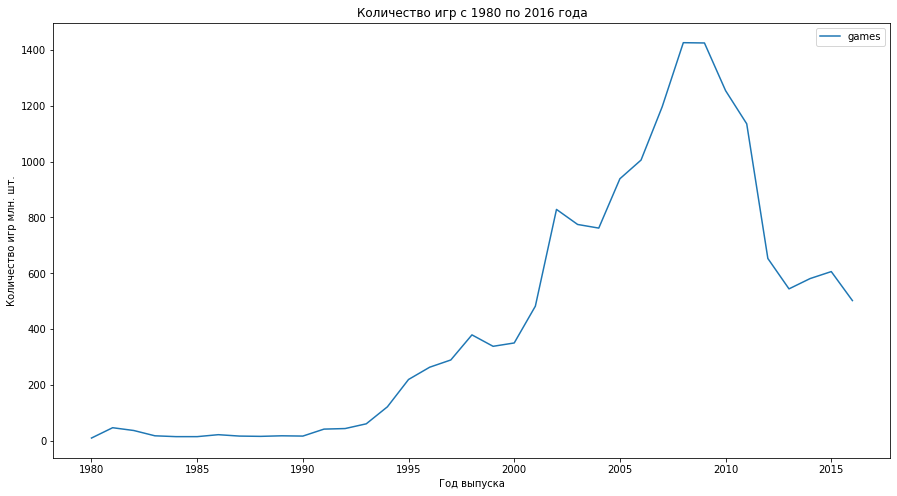

In [26]:
games_years.plot(figsize=(15,8));
plt.title("Количество игр с 1980 по 2016 года");
plt.xlabel("Год выпуска");
plt.ylabel("Количество игр млн. шт.");

#### Вывод

До 1995 года выпускалось очень мало игр. После 2010 года выпуск игр пошел на спад, но их всё ещё достаточно большое количество. Считаю, что данные за период до 1995 года не важны.

### Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

Составлю таблицу с продажами по каждой платформе.

In [27]:
games_sales = pd.pivot_table(games, index=['platform'], values='all_sales', aggfunc='sum')
games_sales = games_sales.sort_values('all_sales',ascending=False)
display(games_sales)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выделю топ 7 платформ.

In [28]:
top_platform = list(games_sales.index[:7])
display(top_platform)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']

При проведении исследования оказалось, что одна игра для Nintendo_DS вышла раньше выхода консоли. Верну истинное значение.

In [29]:
Nintendo_DS = games.query('(platform == "DS") & (year_of_release < 2004)')
display(Nintendo_DS)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,M,0.02


In [30]:
games.loc[games['name']=='Strongest Tokyo University Shogi DS', 'year_of_release']=2010
display(games.loc[15957])

name               Strongest Tokyo University Shogi DS
platform                                            DS
year_of_release                                   2010
genre                                           Action
na_sales                                           0.0
eu_sales                                           0.0
jp_sales                                          0.02
other_sales                                        0.0
critic_score                                      <NA>
user_score                                         NaN
rating                                               M
all_sales                                         0.02
Name: 15957, dtype: object

Построю графики.

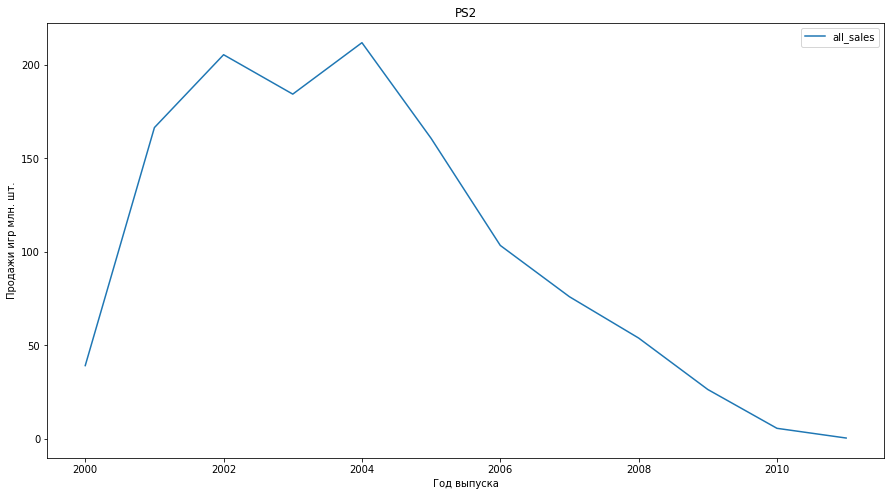

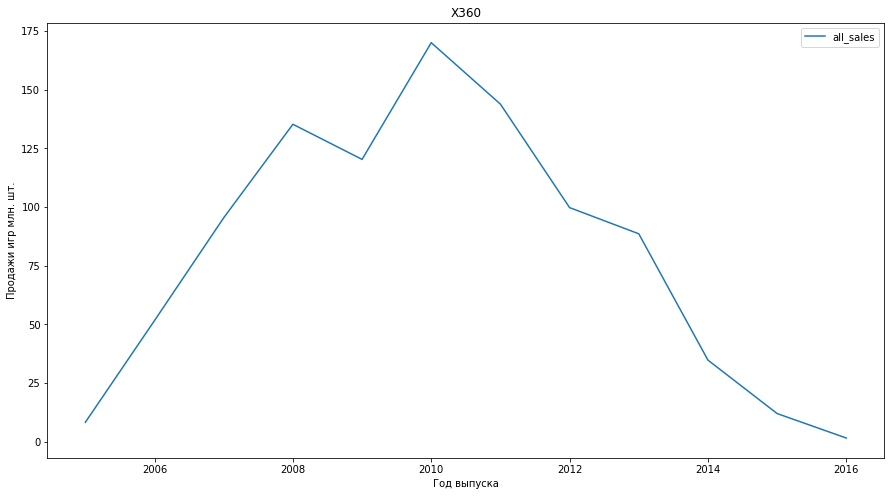

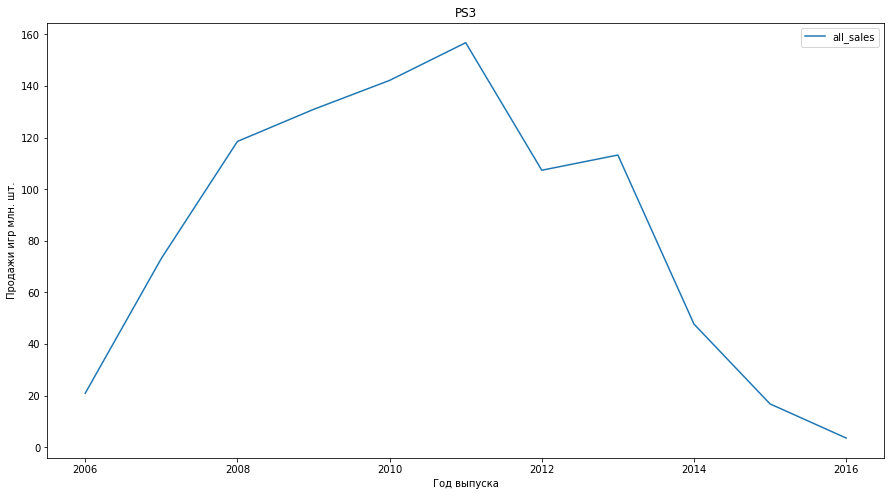

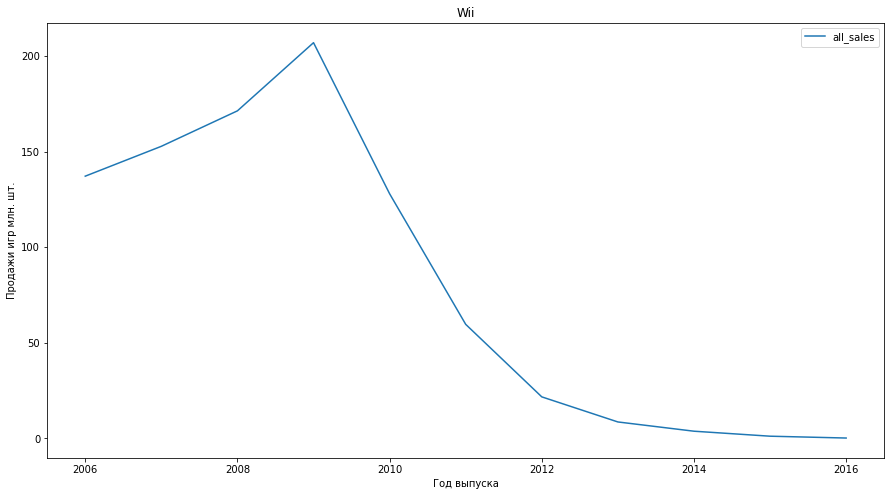

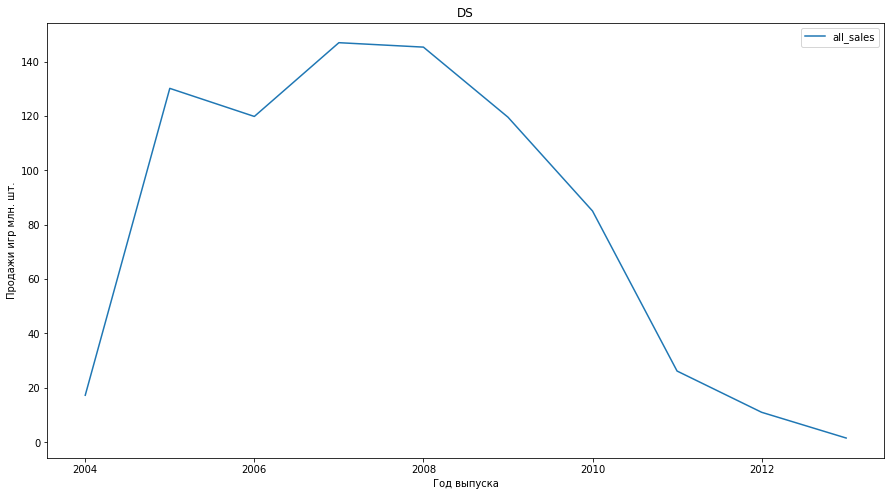

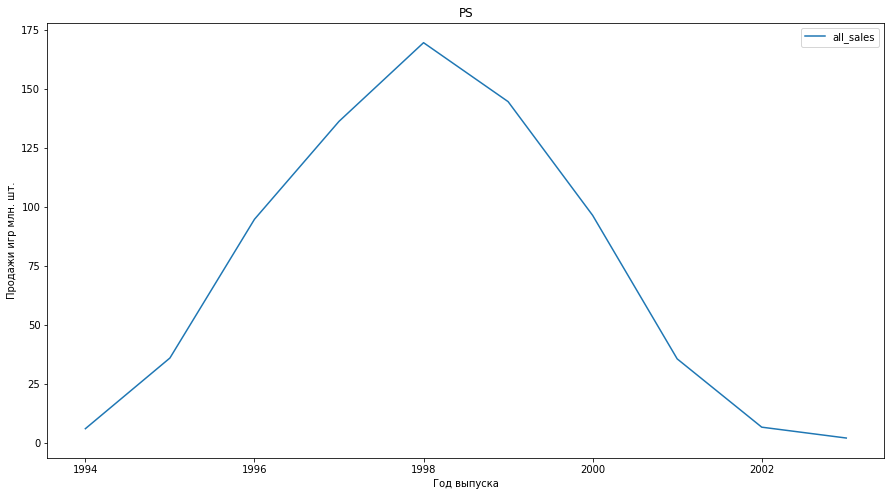

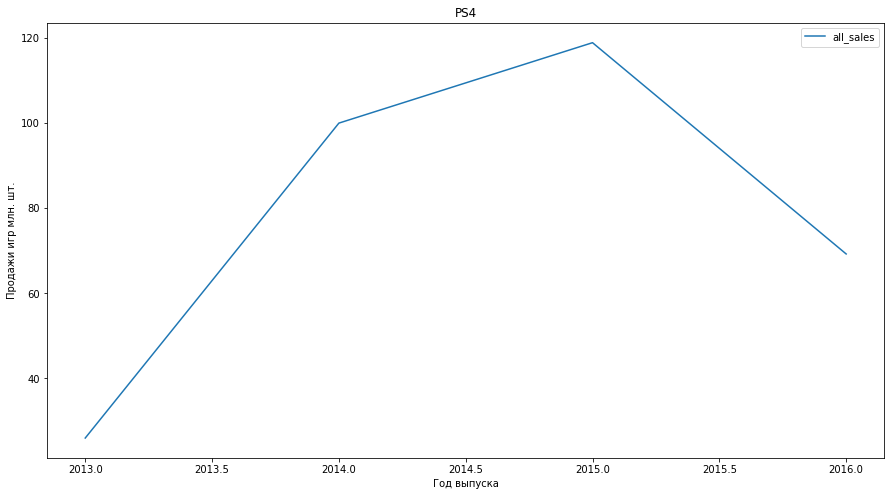

In [31]:
for platform in top_platform:
    platform_sales = pd.pivot_table(games.query('platform == @platform'), index=['year_of_release'], values='all_sales', aggfunc='sum')
    platform_sales.plot(figsize=(15,8));
    plt.title(platform)
    plt.xlabel("Год выпуска");
    plt.ylabel("Продажи игр млн. шт.");

#### Вывод

Согласно полученным данным по топ 7 консолей можно сказать следующее:
- PS2. Продажи игр бурно росли с 2000 по 2002 год. Достигли пика в 2004 году. Затем стали медленно падать до 2011 года и далее. Несмотря на то, что PS3 вышла в 2006 году, продажи игр на PS2 сохранились. Это говорит о том, что разработчики ещё какое-то время поддерживали старую консоль.
- X360. Продажи игр с 2005 по 2008 года росли, пик был достигнут в 2010 году после спада продаж в 2009. Затем продажи стали падать.
- PS3. Продажи игр росли с 2006 по 2011 год. Затем стали падать с небольшим плато в районе 2012-2013 годов.
- Wii. Продажи игр медленно росли с 2006 по 2009 год. Затем стали резко падать. Для косоли Wii не выходит крупных ААА проектов, это очевидно сказывается на продажах.
- Nintendo DS. Продажи игр росли с 2004 по 2005 года. Затем был медленный рост до 2008 года, после которого начался спад продаж.
- PS. Продажи игр росли с 1994 по 1998 год, затем падали с обратной интенсивностью.
- PS4. Продажи игр росли 2013 по 2015 год. Затем они стали падать.
<br>
По всем консолям есть одинаковые тенденции резких стартов продаж и падением в момент появления консолей нового поколения. Но при этом продажи игр не падают до нуля, а плавно уменьшаются от года к году, что говорит о поддержке производителем своих консолей когда одна и та же игра выходит для консолей разных поколений.

### За какой характерный срок появляются новые и исчезают старые платформы?

На данный вопрос легче всего ответить проследив продажи игр по двум основным производителям консолей - Sony и Microsoft.

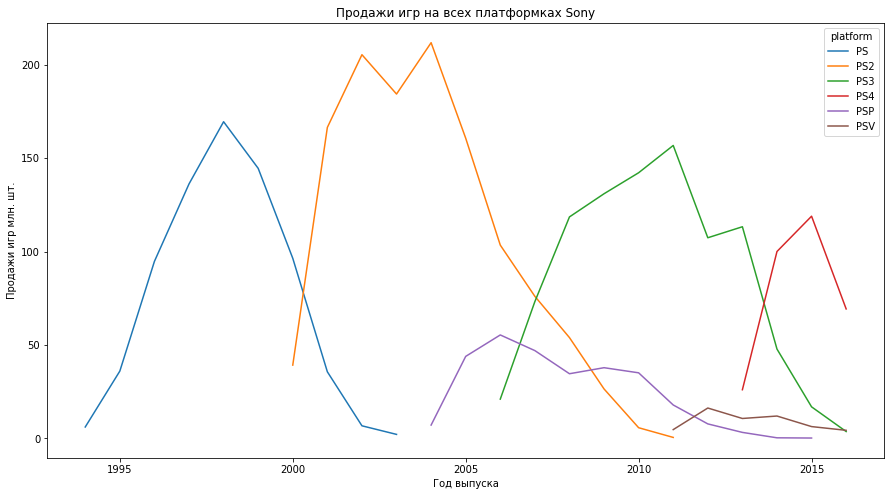

In [32]:
ps_list = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
ps_salles = pd.DataFrame(games.query('platform in @ps_list'))

ps_salles_all = ps_salles.groupby(['platform', 'year_of_release'])[['all_sales']].sum()
plt.figure(figsize=(15,8))
sns.lineplot(x='year_of_release', y='all_sales', hue='platform', data=ps_salles_all.reset_index());
plt.title('Продажи игр на всех платформках Sony')
plt.xlabel("Год выпуска");
plt.ylabel("Продажи игр млн. шт.");

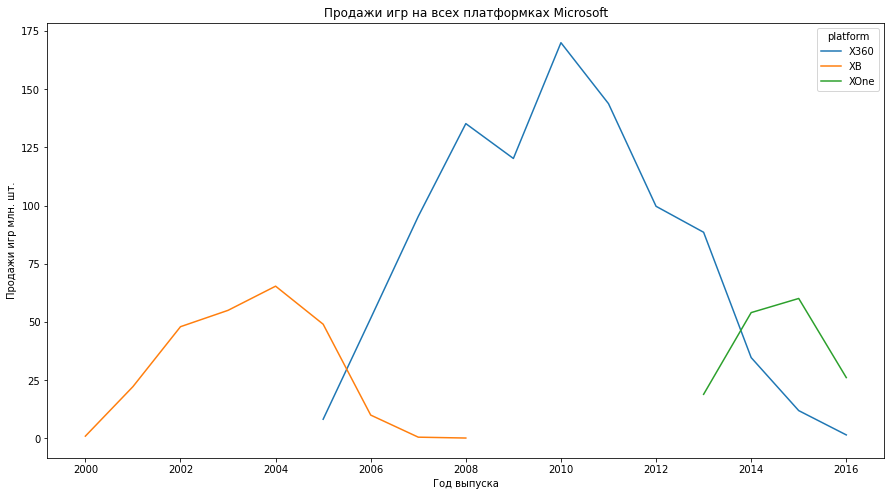

In [33]:
xbox_list = ['X360', 'XB', 'XOne']
xbox_salles = pd.DataFrame(games.query('platform in @xbox_list'))

xbox_salles_all = xbox_salles.groupby(['platform', 'year_of_release'])[['all_sales']].sum()
plt.figure(figsize=(15,8))
sns.lineplot(x='year_of_release',y='all_sales', hue='platform', data=xbox_salles_all.reset_index());
plt.title('Продажи игр на всех платформках Microsoft')
plt.xlabel("Год выпуска");
plt.ylabel("Продажи игр млн. шт.");

#### Вывод

Новые Play Station выходят раз в 6 лет. Xbox выходят от 5 до 8 лет. Считаю, что можно описать среднее время появления консолей нового поколения - 6 лет.

### Определение актуального периода

Так как мне нужно определить период, который мне поможет спрогнозировать 2017 год, считаю правильным исследовать данные с момента появления консолей PS4 и Xbox One, а именно - с 2013 года.

In [34]:
actual_period = games[games['year_of_release'] > 2013]
actual_period.info()
actual_period.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    Int64  
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  all_sales        1689 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 174.8+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,M,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,T,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,M,7.98


#### Вывод

Актуальный период определен на основе данных о выходе консолей последнего поколения - 2013 год.

### Какие платформы лидируют по продажам, растут или падают?

Посмотрю на данные по продажам за актуальный период.

In [35]:
actual_period_sales = pd.pivot_table(actual_period, index=['platform','year_of_release'], values='all_sales', aggfunc = 'sum')
display(actual_period_sales)

all_sales
platform year_of_release           
3DS      2014                 43.76
         2015                 27.78
         2016                 15.14
PC       2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2014                100.00
         2015                118.90
         2016                 69.25
PSP      2014                  0.24
         2015                  0.12
PSV      2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2014                 54.07
         2015                 60.14
         2016                 26.15

In [36]:
actual_period_sales_platform = pd.pivot_table(actual_period_sales, index='platform', values='all_sales', aggfunc = 'sum')
display(actual_period_sales_platform.sort_values('all_sales', ascending=False))

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


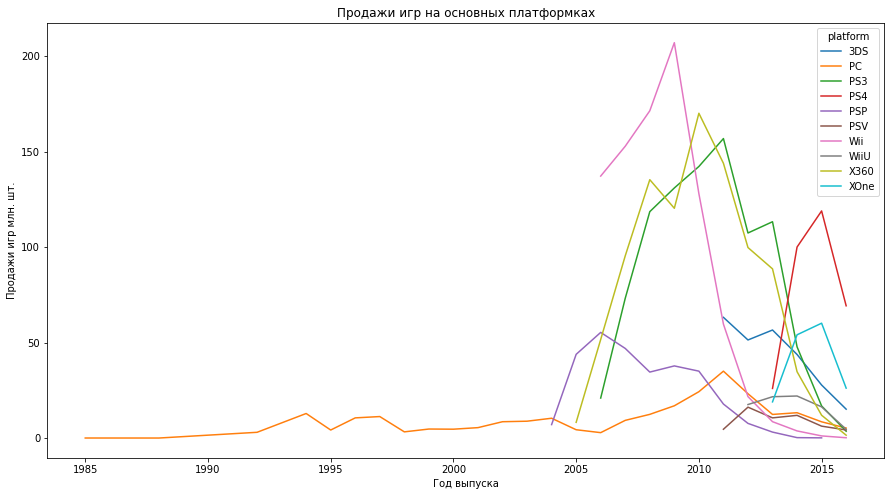

In [37]:
platform_list = ['PSP', 'Wii', 'PS3', 'PS4', 'PC', 'PSV', 'X360', 'WiiU', 'XOne', '3DS']
platform_salles = pd.DataFrame(games.query('platform in @platform_list'))

platform_salles_all = platform_salles.groupby(['platform', 'year_of_release'])[['all_sales']].sum()
plt.figure(figsize=(15,8))
sns.lineplot(x='year_of_release', y='all_sales', hue='platform', data=platform_salles_all.reset_index());
plt.title('Продажи игр на основных платформках')
plt.xlabel("Год выпуска");
plt.ylabel("Продажи игр млн. шт.");

#### Вывод

По всем платформам сумма продаж игр падает в актуальном периоде.
<br>
- Больше всего продаж у PS4, хотя продажи и падают в ожидании PS5, она все ещё интересна разработчикам игр.
<br>
- Вполовину меньше продж у XOne, но тут следует учесть, что PS4 на рынке на год дольше. Но общие продажи также падают в ожидании Xbox Series X. Считаю, что XOne всё ещё интересен разработчикам игр.
<br>
- Nintendo 3DS имеет третье место по продажам за актуальный переиод. Но так как как Nintendo 3DS портативная консоль, и конкуренты в лице PSP, PSV, WiiU имеют гораздо меньшие продажи, считаю эту консоль интересной для разработчиков игр.
<br>
- Продажи игр на косолях PS3, X360, Wii в  конце актуального периода сократились до минимума. Данные консоли уже не интересны разработчикам игр.
<br>
- Мне не очень понятна ситуация с продажами игр на PC, возможно это специфика предоставленных данных. Данная платформа не подвержена изменениям дохода продаж игр при появлении платформы нового поколения, так как PC - это модернизируемая платформа и её железо всегда можно считать актуальным. Считаю, что данная платформа всегда будет актуальна разработчикам игр. 

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Построю необходимый график.

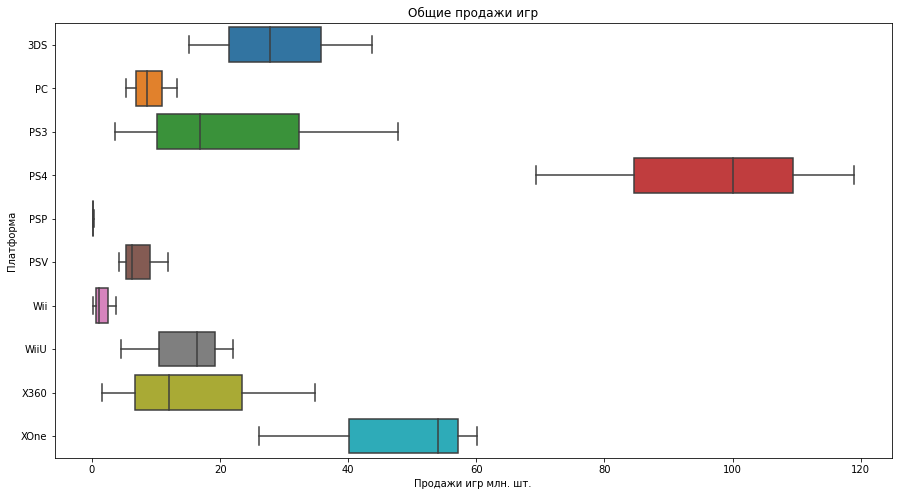

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(x="all_sales", y="platform", data=actual_period_sales.reset_index());
plt.title('Общие продажи игр')
plt.xlabel("Продажи игр млн. шт.");
plt.ylabel("Платформа");

#### Вывод

По данному графику понятно как распределяется прибыль по платформам за актуальный период относительно друг друга. Цифры, полученные в таблице раздела 4.5 трудны для восприятия картины в целом. Тут же сразу понятно насколько PS4 всепереди всех остальных консолей и насколько маленький доход приносит PSP за актуальный период.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Посмотрю на корреляцию по основным платформам. Также построю корреляционную матрицу. 

,all_sales,critic_score,user_score
all_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


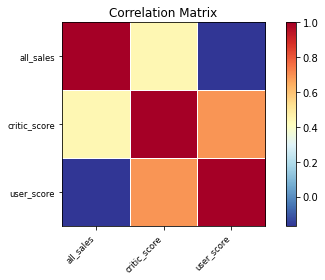

In [59]:
actual_period_ps3 = actual_period_nan[actual_period_nan['platform'] == 'PS3']
actual_period_ps3 = actual_period_ps3.loc[:,['all_sales', 'critic_score', 'user_score']]
display(actual_period_ps3.corr())
corr = actual_period_ps3.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

,all_sales,critic_score,user_score
all_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


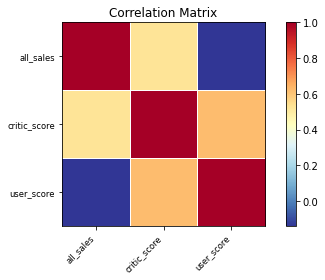

In [60]:
actual_period_x360 = actual_period[actual_period['platform'] == 'X360']
actual_period_x360 = actual_period_x360.loc[:,['all_sales', 'critic_score', 'user_score']]
display(actual_period_x360.corr())
corr = actual_period_x360.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

,all_sales,critic_score,user_score
all_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


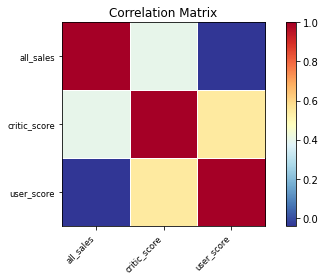

In [61]:
actual_period_ps4 = actual_period[actual_period['platform'] == 'PS4']
actual_period_ps4 = actual_period_ps4.loc[:,['all_sales', 'critic_score', 'user_score']]
display(actual_period_ps4.corr())
corr = actual_period_ps4.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

,all_sales,critic_score,user_score
all_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


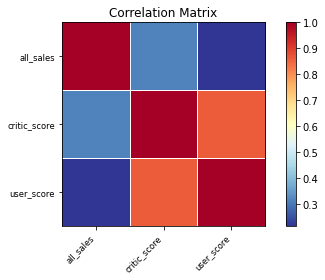

In [62]:
actual_period_3ds = actual_period[actual_period['platform'] == '3DS']
actual_period_3ds = actual_period_3ds.loc[:,['all_sales', 'critic_score', 'user_score']]
display(actual_period_3ds.corr())
corr = actual_period_3ds.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

,all_sales,critic_score,user_score
all_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


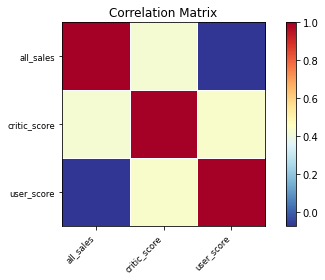

In [63]:
actual_period_xone = actual_period[actual_period['platform'] == 'XOne']
actual_period_xone = actual_period_xone.loc[:,['all_sales', 'critic_score', 'user_score']]
display(actual_period_xone.corr())
corr = actual_period_xone.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

,all_sales,critic_score,user_score
all_sales,1.000000,0.370201,0.407926
critic_score,0.370201,1.000000,0.763536
user_score,0.407926,0.763536,1.000000


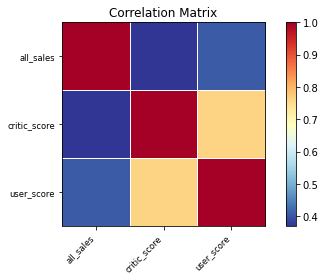

In [64]:
actual_period_wiiu = actual_period[actual_period['platform'] == 'WiiU']
actual_period_wiiu = actual_period_wiiu.loc[:,['all_sales', 'critic_score', 'user_score']]
display(actual_period_wiiu.corr())
corr = actual_period_wiiu.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

,all_sales,critic_score,user_score
all_sales,1.000000,0.174634,-0.071597
critic_score,0.174634,1.000000,0.466099
user_score,-0.071597,0.466099,1.000000


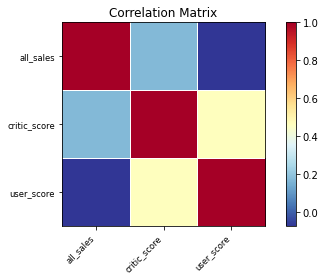

In [65]:
actual_period_pc = actual_period[actual_period['platform'] == 'PC']
actual_period_pc = actual_period_pc.loc[:,['all_sales', 'critic_score', 'user_score']]
display(actual_period_pc.corr())
corr = actual_period_pc.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

#### Вывод

По всем проверенным платформам продажи растут у тех игр, у которых оценка критиков и пользователей выше. Оценки критиков и пользователей имеют линейную зависимость, то есть в большинстве случаев они схожи. В основном продажи большие у тех игр для которых оценка критиков выше 50 и оценка пользователей выше 4.

### Общее распределение игр по жанрам

Посмотрю на данные по продажам в зависимости от жанра игры для актуального периода.

In [66]:
actual_period_genre = pd.pivot_table(actual_period, index='genre', values='all_sales', aggfunc='sum')
actual_period_genre.sort_values('all_sales', ascending=False)

,all_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


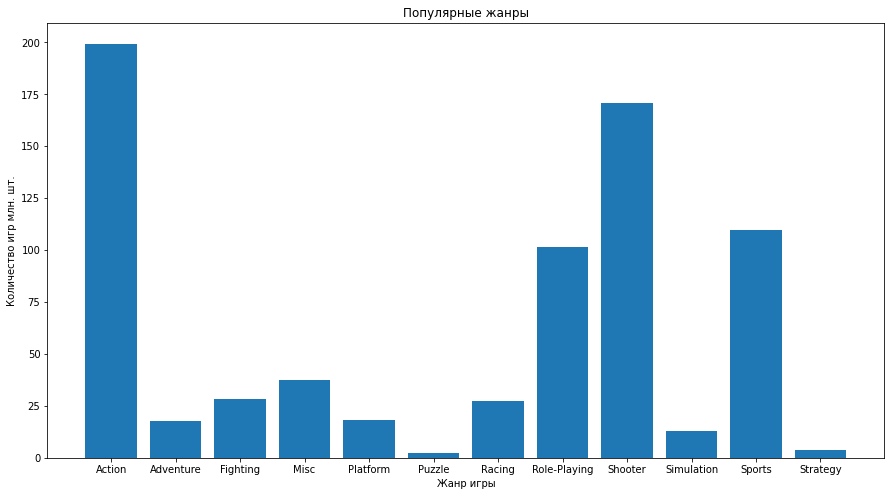

In [67]:
plt.figure(figsize=(15,8))
plt.bar(actual_period_genre.index, actual_period_genre['all_sales'])
plt.title('Популярные жанры')
plt.xlabel("Жанр игры");
plt.ylabel("Количество игр млн. шт.");

#### Вывод

Самый продаваемы жанр Action и Shooter (что по сути тоже Action). Спортивные игры и RPG также имеют высокие продажи. Остальные жанры дают гораздо меньшие продажи, чем первая четверка. Замыкает рейтинг жанр головоломок, в нем не выходят крупные AAA проекты приносящие больой доход и вообще это довольно нишевый жанр.

## Шаг 4. Портрет пользователя каждого региона

### Северная Америка

Проанализирую данные по платформе, жарну и рейтингу для игр, которые в северной Америке имели продажи больше нуля.

In [68]:
actual_period_na = actual_period.query('na_sales > 0')
actual_period_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 31 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             981 non-null    object 
 1   platform         981 non-null    object 
 2   year_of_release  981 non-null    Int64  
 3   genre            981 non-null    object 
 4   na_sales         981 non-null    float64
 5   eu_sales         981 non-null    float64
 6   jp_sales         981 non-null    float64
 7   other_sales      981 non-null    float64
 8   critic_score     571 non-null    Int64  
 9   user_score       713 non-null    float64
 10  rating           981 non-null    object 
 11  all_sales        981 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 101.5+ KB


,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


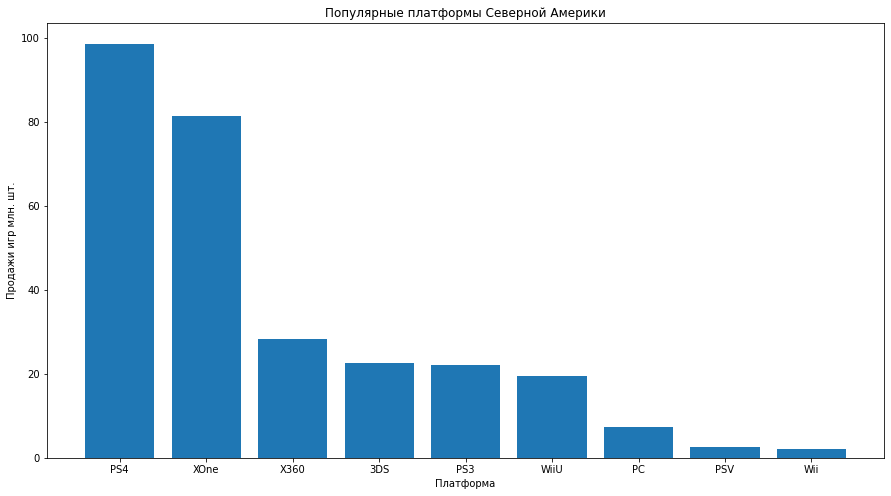

In [69]:
actual_period_na_platform = pd.pivot_table(actual_period_na, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
display(actual_period_na_platform)

plt.figure(figsize=(15,8))
plt.bar(actual_period_na_platform.index, actual_period_na_platform['na_sales'])
plt.title('Популярные платформы Северной Америки')
plt.xlabel("Платформа");
plt.ylabel("Продажи игр млн. шт.");

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


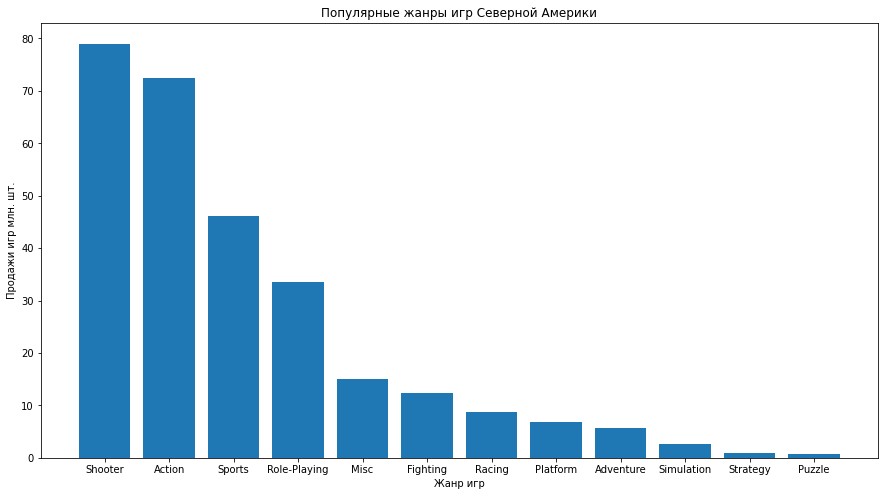

In [70]:
actual_period_na_genre = pd.pivot_table(actual_period_na, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
display(actual_period_na_genre)

plt.figure(figsize=(15,8))
plt.bar(actual_period_na_genre.index, actual_period_na_genre['na_sales'])
plt.title('Популярные жанры игр Северной Америки')
plt.xlabel("Жанр игр");
plt.ylabel("Продажи игр млн. шт.");

,na_sales
rating,
M,131.67
T,59.67
E,59.49
E10+,33.23


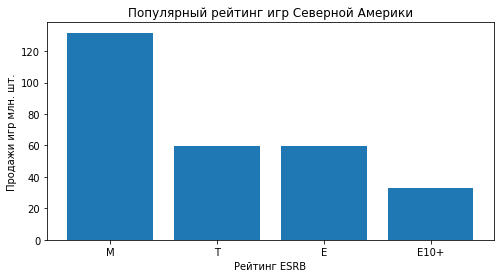

In [71]:
actual_period_na_rating = pd.pivot_table(actual_period_na, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
display(actual_period_na_rating)

plt.figure(figsize=(8,4))
plt.bar(actual_period_na_rating.index, actual_period_na_rating['na_sales'])
plt.title('Популярный рейтинг игр Северной Америки')
plt.xlabel("Рейтинг ESRB");
plt.ylabel("Продажи игр млн. шт.");

Средний геймер северной Америки владеет PS4 или XOne, предпочитает игры жанра Shooter или Action рейтинга М.
<br>
ТОП-5 платформ:
- PS4
- XOne
- X360
- 3DS
- PS3

ТОП-5 жанров:
- Shooter
- Action
- Sports
- Role-Playing
- Misc

Рейтинг M определенно влияет на покупку игры.

### Европа

Проанализирую данные по платформе, жарну и рейтингу для игр, которые в Европе имели продажи больше нуля.

In [72]:
actual_period_eu = actual_period.query('eu_sales > 0')
actual_period_eu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 31 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1067 non-null   object 
 1   platform         1067 non-null   object 
 2   year_of_release  1067 non-null   Int64  
 3   genre            1067 non-null   object 
 4   na_sales         1067 non-null   float64
 5   eu_sales         1067 non-null   float64
 6   jp_sales         1067 non-null   float64
 7   other_sales      1067 non-null   float64
 8   critic_score     626 non-null    Int64  
 9   user_score       774 non-null    float64
 10  rating           1067 non-null   object 
 11  all_sales        1067 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 110.5+ KB


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


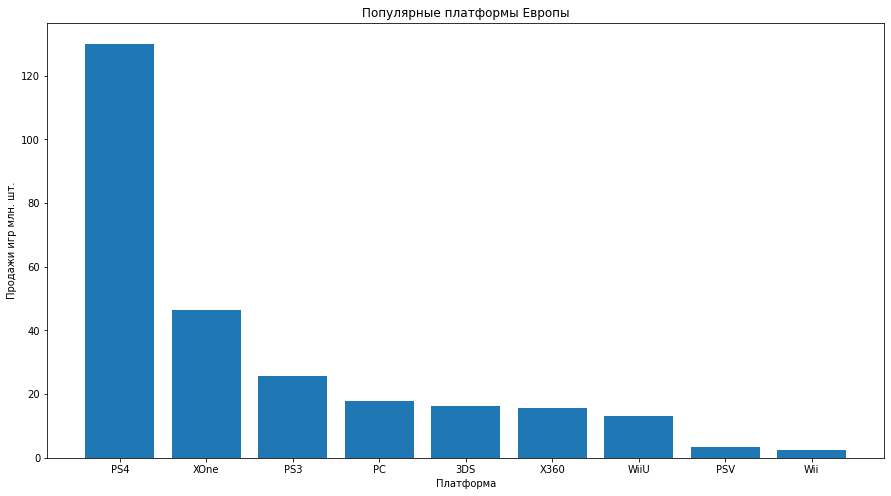

In [73]:
actual_period_eu_platform = pd.pivot_table(actual_period_eu, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
display(actual_period_eu_platform)

plt.figure(figsize=(15,8))
plt.bar(actual_period_eu_platform.index, actual_period_eu_platform['eu_sales'])
plt.title('Популярные платформы Европы')
plt.xlabel("Платформа");
plt.ylabel("Продажи игр млн. шт.");

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Misc,12.86
Simulation,7.30
Platform,6.80
Fighting,6.69


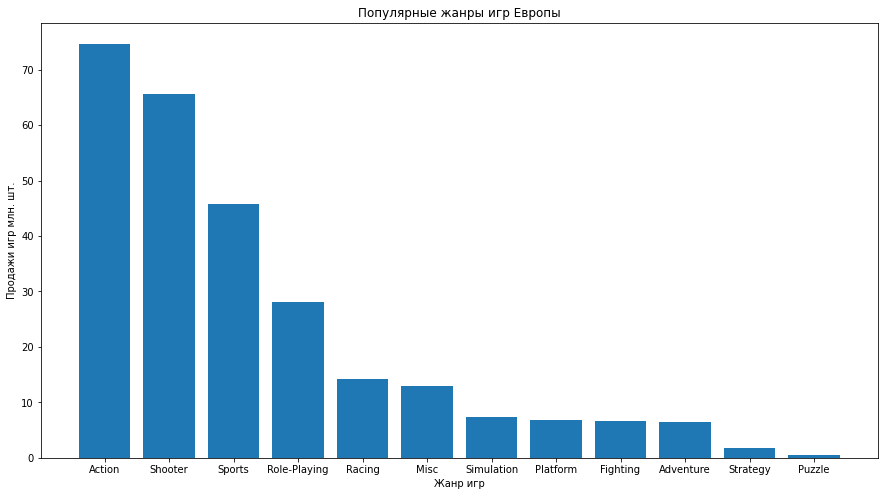

In [74]:
actual_period_eu_genre = pd.pivot_table(actual_period_eu, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
display(actual_period_eu_genre)

plt.figure(figsize=(15,8))
plt.bar(actual_period_eu_genre.index, actual_period_eu_genre['eu_sales'])
plt.title('Популярные жанры игр Европы')
plt.xlabel("Жанр игр");
plt.ylabel("Продажи игр млн. шт.");

,eu_sales
rating,
M,125.69
E,71.52
T,47.31
E10+,26.16


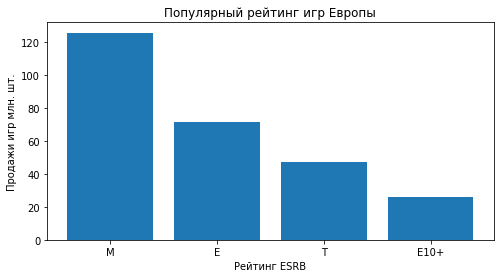

In [75]:
actual_period_eu_rating = pd.pivot_table(actual_period_eu, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
display(actual_period_eu_rating)

plt.figure(figsize=(8,4))
plt.bar(actual_period_eu_rating.index, actual_period_eu_rating['eu_sales'])
plt.title('Популярный рейтинг игр Европы')
plt.xlabel("Рейтинг ESRB");
plt.ylabel("Продажи игр млн. шт.");

Средний геймер Европы владеет PS4, предпочитает игры жанра Action или Shooter рейтинга М.
<br>
ТОП-5 платформ:
- PS4
- XOne
- PS3
- PC
- 3DS

ТОП-5 жанров:
- Action
- Shooter
- Sports
- Role-Playing
- Racing

Рейтинг M определенно влияет на покупку игры.

### Япония

Проанализирую данные по платформе, жарну и рейтингу для игр, которые в Японии имели продажи больше нуля.

In [76]:
actual_period_jp = actual_period.query('jp_sales > 0')
actual_period_jp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             873 non-null    object 
 1   platform         873 non-null    object 
 2   year_of_release  873 non-null    Int64  
 3   genre            873 non-null    object 
 4   na_sales         873 non-null    float64
 5   eu_sales         873 non-null    float64
 6   jp_sales         873 non-null    float64
 7   other_sales      873 non-null    float64
 8   critic_score     278 non-null    Int64  
 9   user_score       327 non-null    float64
 10  rating           873 non-null    object 
 11  all_sales        873 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 90.4+ KB


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08


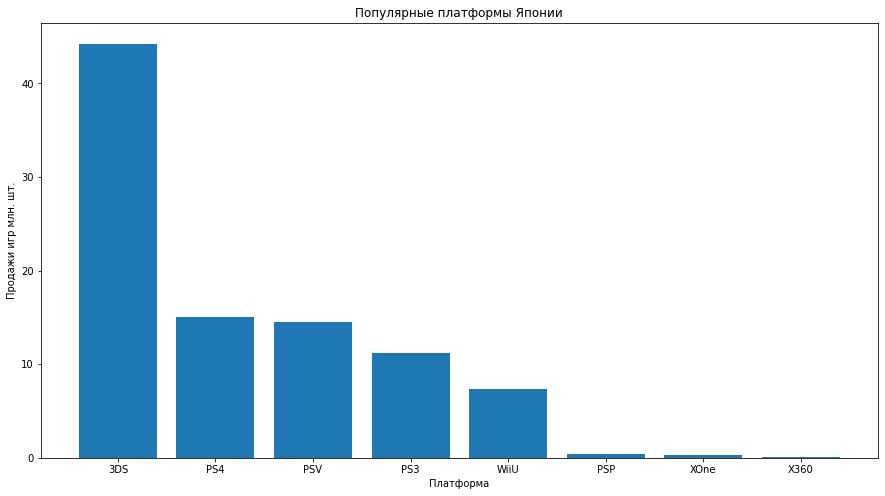

In [77]:
actual_period_jp_platform = pd.pivot_table(actual_period_jp, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
display(actual_period_jp_platform)

plt.figure(figsize=(15,8))
plt.bar(actual_period_jp_platform.index, actual_period_jp_platform['jp_sales'])
plt.title('Популярные платформы Японии')
plt.xlabel("Платформа");
plt.ylabel("Продажи игр млн. шт.");

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Adventure,3.60
Sports,3.26
Platform,2.69
Simulation,2.31


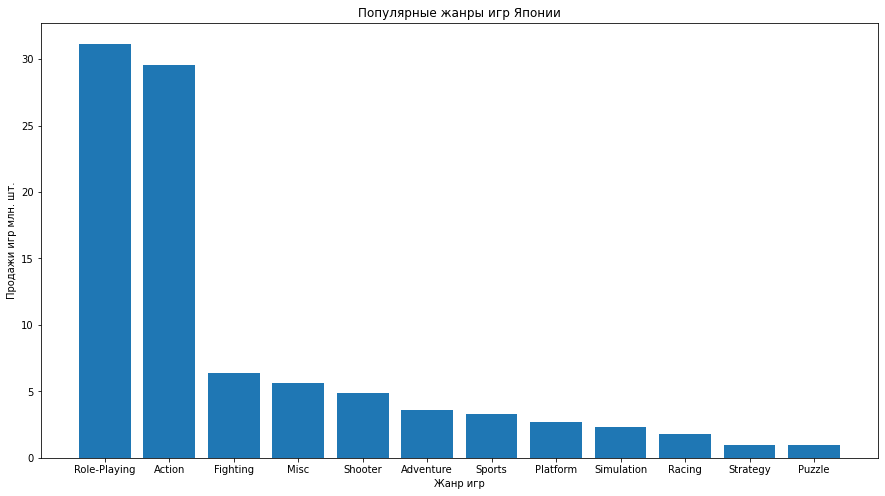

In [53]:
actual_period_jp_genre = pd.pivot_table(actual_period_jp, index='genre', values='jp_sales',
                    
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
display(actual_period_jp_genre)

plt.figure(figsize=(15,8))
plt.bar(actual_period_jp_genre.index, actual_period_jp_genre['jp_sales'])
plt.title('Популярные жанры игр Японии')
plt.xlabel("Жанр игр");
plt.ylabel("Продажи игр млн. шт.");

,jp_sales
rating,
T,40.32
M,32.10
E,16.21
E10+,4.46


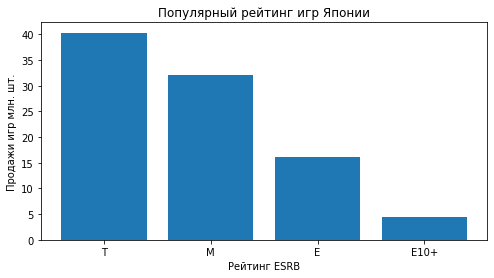

In [78]:
actual_period_jp_rating = pd.pivot_table(actual_period_jp, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
display(actual_period_jp_rating)

plt.figure(figsize=(8,4))
plt.bar(actual_period_jp_rating.index, actual_period_jp_rating['jp_sales'])
plt.title('Популярный рейтинг игр Японии')
plt.xlabel("Рейтинг ESRB");
plt.ylabel("Продажи игр млн. шт.");

Средний геймер Японии владеет 3DS, предпочитает игры жанра RPG или Action рейтинга T.
<br>
ТОП-5 платформ:
- 3DS
- PS4
- PSV
- PS3
- WiiU

ТОП-5 жанров:
- Role-Playing
- Action
- Fighting
- Misc
- Shooter

Рейтинг T определенно влияет на покупку игры.

### Остальной мир

Проанализирую данные по платформе, жарну и рейтингу для игр, которые в остальном мире имели продажи больше нуля.

In [79]:
actual_period_other = actual_period.query('other_sales > 0')
actual_period_other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 31 to 14979
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             920 non-null    object 
 1   platform         920 non-null    object 
 2   year_of_release  920 non-null    Int64  
 3   genre            920 non-null    object 
 4   na_sales         920 non-null    float64
 5   eu_sales         920 non-null    float64
 6   jp_sales         920 non-null    float64
 7   other_sales      920 non-null    float64
 8   critic_score     547 non-null    Int64  
 9   user_score       679 non-null    float64
 10  rating           920 non-null    object 
 11  all_sales        920 non-null    float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 95.2+ KB


,other_sales
platform,
PS4,43.81
XOne,12.48
PS3,9.14
X360,4.27
3DS,3.59
WiiU,3.13
PC,1.85
PSV,1.66
Wii,0.40


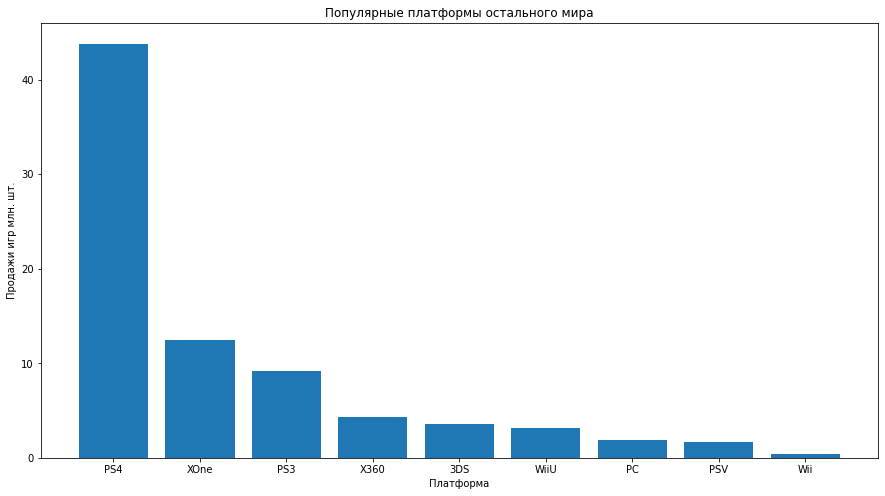

In [80]:
actual_period_other_platform = pd.pivot_table(actual_period_eu, index='platform', values='other_sales',
                                        aggfunc='sum').sort_values('other_sales', ascending=False)
display(actual_period_other_platform)

plt.figure(figsize=(15,8))
plt.bar(actual_period_other_platform.index, actual_period_other_platform['other_sales'])
plt.title('Популярные платформы остального мира')
plt.xlabel("Платформа");
plt.ylabel("Продажи игр млн. шт.");

,other_sales
genre,
Action,22.57
Shooter,21.53
Sports,14.36
Role-Playing,8.64
Misc,4.03
Racing,2.89
Fighting,2.73
Adventure,1.82
Platform,1.81


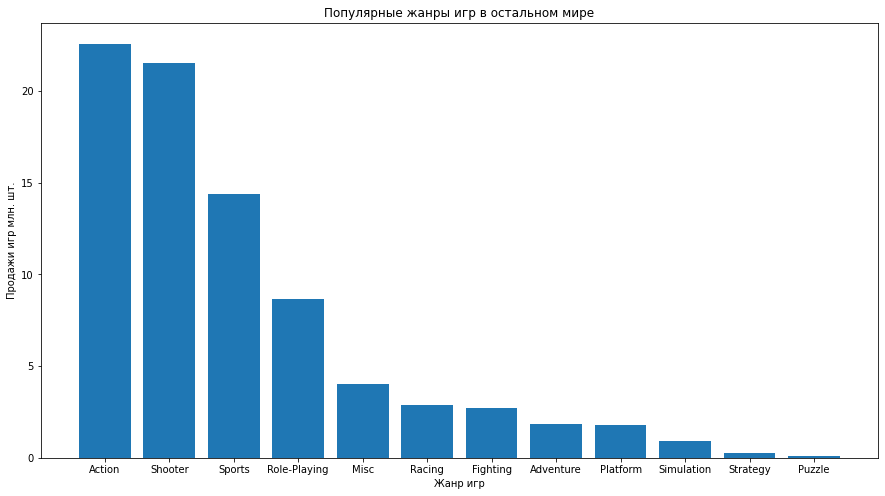

In [81]:
actual_period_other_genre = pd.pivot_table(actual_period_other, index='genre', values='other_sales',
                                        aggfunc='sum').sort_values('other_sales', ascending=False)
display(actual_period_other_genre)

plt.figure(figsize=(15,8))
plt.bar(actual_period_other_genre.index, actual_period_other_genre['other_sales'])
plt.title('Популярные жанры игр в остальном мире')
plt.xlabel("Жанр игр");
plt.ylabel("Продажи игр млн. шт.");

,other_sales
rating,
M,39.40
E,18.87
T,15.52
E10+,7.83


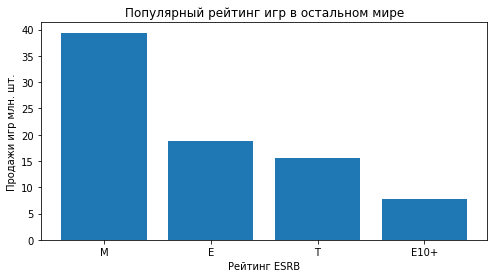

In [82]:
actual_period_other_rating = pd.pivot_table(actual_period_other, index='rating', values='other_sales',
                                        aggfunc='sum').sort_values('other_sales', ascending=False)
display(actual_period_other_rating)

plt.figure(figsize=(8,4))
plt.bar(actual_period_other_rating.index, actual_period_other_rating['other_sales'])
plt.title('Популярный рейтинг игр в остальном мире')
plt.xlabel("Рейтинг ESRB");
plt.ylabel("Продажи игр млн. шт.");

Средний геймер в остальном мире владеет PS4, предпочитает игры жанра Action или Shooter рейтинга М.
<br>
ТОП-5 платформ:
- PS4
- XOne
- PS3
- X360
- 3DS

ТОП-5 жанров:
- Action
- Shooter
- Sports
- Role-Playing	
- Misc

Рейтинг M определенно влияет на покупку игры.

### Вывод

Геймеры по всему миру, кроме Японии предпочитают на PS4 играть в Action или Shooter с рейтингом М. А вот в Японии геймеры на 3DS играют в RPG или Action с рейтингом T.

## Шаг 5. Проверка гипотез

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверю статистические данные пользователей Xbox One и PC.

In [83]:
user_xone = actual_period.query('platform == "XOne"')
user_xone = user_xone[user_xone['user_score'].notna()]
user_xone['user_score'].describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [84]:
user_pc = actual_period.query('platform == "PC"')
user_pc = user_pc[user_pc['user_score'].notna()]
user_pc['user_score'].describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Средние значения довольно близки.

Проверю гипотезу. Буду использовать тест Стюдента.

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не равны.

Коэффициент alpha беру равным 0.01, так как это общепринятое значение.

In [86]:
alpha = 0.01

results = st.ttest_ind(user_xone['user_score'], user_pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


### Гипотеза 1. Средние пользовательские рейтинги жанров Action и Sports разные

Проверю статистические данные по жанрам Action и Sports.

In [87]:
user_action = actual_period.query('genre == "Action"')
user_action = user_action[user_action['user_score'].notna()]
user_action['user_score'].describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [88]:
user_sports = actual_period.query('genre == "Sports"')
user_sports = user_sports[user_sports['user_score'].notna()]
user_sports['user_score'].describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

Средние значения отличаются.

Проверю гипотезу. Буду использовать тест Стюдента.

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не равны.

Коэффициент alpha беру равным 0.01, так как это общепринятое значение.

In [64]:
alpha = 0.01

results = st.ttest_ind(user_action['user_score'], user_sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


### Вывод

Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась. Средние этих выборок также очень близки друг к другу. Пользователи ставят примерно одинаковые оценки играм на платформах Xbox One и PC.
<br>
Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные не подтвердилась. Средние этих выборок также различаются. Пользователи ставят разные оценки играм с жанрами Action и Sports.

## Общий вывод

В ходе проведенного исследования я выполнил следующие шаги:

Рассмотрел таблицу с данными, выявил столбцы, на которые стоит обратить внимание при подготовке данных.
Провел подготовку данных: заменил наименования столбцов, заполнил пропуски, данные привел к нужному типу, удалил выявленные артефакты.
Провел анализ данных и определил актуальный период.
В ходе исследовательского анализа данных получил ответы на все поставленные вопросы. 
Составил портреты пользователей для выделенных регионов продаж.
Выполнил проверку двух гипотез.

Продажи игр зависят от трех основных составляющих: платформа, жанр, рейтинг критиков и пользователей.

Сводный анализ для кампании на 2017 год.
<br>
Необходимо сделать ставку на консоли нового поколения и на топ-5 платформ того региона в котором находится точка продажи. Жанр игр также лучше брать из топ-5 по регионам распространения. Судя по популярному рейтингу M - большинство геймеров старше 17 лет. Игр с таким рейтингом должно быть большинство в точках распространения. Также надо следить за рейтингом критиков и пользователей. Игры с низким рейтингом продаются плохо и незачем заполнять ими полки.

Также необходимо понимать, что в актуальном периоде продажи игр падали по всем платформам, можно спрогнозировать меньшую выручку в 2017 году чем в 2016. Но не стоит забывать о скором выходе консолей нового поколения, так как в момент их выпуска продажи игр растут несколько лет подряд. Можно заранее озаботиться договорами на поставку таких игр.